<a href="https://colab.research.google.com/github/bhuvangambhir/Stock_Price_Prediction_Model/blob/main/stock-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

dfs = []
for comp in companies:
    df = yf.download(comp, start='2016-01-01', end='2026-01-01')
    df['Company'] = comp
    dfs.append(df)

data = pd.concat(dfs)
data.reset_index(inplace=True)

/tmp/ipython-input-71218262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(comp, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-71218262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(comp, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-71218262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(comp, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-71218262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(comp, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-71218

In [18]:
data.head()

Price        Date Company       Open                            High       \
Ticker                          AAPL MSFT GOOGL AMZN TSLA       AAPL MSFT   
0      2016-01-04    AAPL  23.135365  NaN   NaN  NaN  NaN  23.757659  NaN   
1      2016-01-05    AAPL  23.843341  NaN   NaN  NaN  NaN  23.865887  NaN   
2      2016-01-06    AAPL  22.673156  NaN   NaN  NaN  NaN  23.081256  NaN   
3      2016-01-07    AAPL  22.249276  NaN   NaN  NaN  NaN  22.576205  NaN   
4      2016-01-08    AAPL  22.219966  NaN   NaN  NaN  NaN  22.346228  NaN   

Price         ...      Close                            Volume             \
Ticker GOOGL  ...       AAPL MSFT GOOGL AMZN TSLA         AAPL MSFT GOOGL   
0        NaN  ...  23.753149  NaN   NaN  NaN  NaN  270597600.0  NaN   NaN   
1        NaN  ...  23.157915  NaN   NaN  NaN  NaN  223164000.0  NaN   NaN   
2        NaN  ...  22.704721  NaN   NaN  NaN  NaN  273829600.0  NaN   NaN   
3        NaN  ...  21.746479  NaN   NaN  NaN  NaN  324377600.0  NaN   NaN   
4        NaN  ...  21.861469  NaN   NaN  NaN  NaN  283192000.0  NaN   NaN   

Price             
Ticker AMZN TSLA  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  

[5 rows x 27 columns]

In [19]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[['Date', 'Company'] + features]

In [20]:
data.shape

(12570, 27)

In [21]:
data.head()

Price        Date Company       Open                            High       \
Ticker                          AAPL MSFT GOOGL AMZN TSLA       AAPL MSFT   
0      2016-01-04    AAPL  23.135365  NaN   NaN  NaN  NaN  23.757659  NaN   
1      2016-01-05    AAPL  23.843341  NaN   NaN  NaN  NaN  23.865887  NaN   
2      2016-01-06    AAPL  22.673156  NaN   NaN  NaN  NaN  23.081256  NaN   
3      2016-01-07    AAPL  22.249276  NaN   NaN  NaN  NaN  22.576205  NaN   
4      2016-01-08    AAPL  22.219966  NaN   NaN  NaN  NaN  22.346228  NaN   

Price         ...      Close                            Volume             \
Ticker GOOGL  ...       AAPL MSFT GOOGL AMZN TSLA         AAPL MSFT GOOGL   
0        NaN  ...  23.753149  NaN   NaN  NaN  NaN  270597600.0  NaN   NaN   
1        NaN  ...  23.157915  NaN   NaN  NaN  NaN  223164000.0  NaN   NaN   
2        NaN  ...  22.704721  NaN   NaN  NaN  NaN  273829600.0  NaN   NaN   
3        NaN  ...  21.746479  NaN   NaN  NaN  NaN  324377600.0  NaN   NaN   
4        NaN  ...  21.861469  NaN   NaN  NaN  NaN  283192000.0  NaN   NaN   

Price             
Ticker AMZN TSLA  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  

[5 rows x 27 columns]

In [22]:
data.tail()

Price        Date Company Open                             High             \
Ticker                    AAPL MSFT GOOGL AMZN        TSLA AAPL MSFT GOOGL   
12565  2025-12-24    TSLA  NaN  NaN   NaN  NaN  488.480011  NaN  NaN   NaN   
12566  2025-12-26    TSLA  NaN  NaN   NaN  NaN  485.230011  NaN  NaN   NaN   
12567  2025-12-29    TSLA  NaN  NaN   NaN  NaN  469.000000  NaN  NaN   NaN   
12568  2025-12-30    TSLA  NaN  NaN   NaN  NaN  461.089996  NaN  NaN   NaN   
12569  2025-12-31    TSLA  NaN  NaN   NaN  NaN  456.100006  NaN  NaN   NaN   

Price   ... Close                             Volume                  \
Ticker  ...  AAPL MSFT GOOGL AMZN        TSLA   AAPL MSFT GOOGL AMZN   
12565   ...   NaN  NaN   NaN  NaN  485.399994    NaN  NaN   NaN  NaN   
12566   ...   NaN  NaN   NaN  NaN  475.190002    NaN  NaN   NaN  NaN   
12567   ...   NaN  NaN   NaN  NaN  459.640015    NaN  NaN   NaN  NaN   
12568   ...   NaN  NaN   NaN  NaN  454.429993    NaN  NaN   NaN  NaN   
12569   ...   NaN  NaN   NaN  NaN  449.720001    NaN  NaN   NaN  NaN   

Price               
Ticker        TSLA  
12565   41285400.0  
12566   58780700.0  
12567   66263000.0  
12568   59238500.0  
12569   49078000.0  

[5 rows x 27 columns]

In [25]:
print(features)
print(data[features].shape)

['Open', 'High', 'Low', 'Close', 'Volume']
(12570, 25)


In [28]:
print(type(data.columns))
print(data.columns)

<class 'pandas.core.indexes.multi.MultiIndex'>
MultiIndex([(   'Date',      ''),
            ('Company',      ''),
            (   'Open',  'AAPL'),
            (   'Open',  'MSFT'),
            (   'Open', 'GOOGL'),
            (   'Open',  'AMZN'),
            (   'Open',  'TSLA'),
            (   'High',  'AAPL'),
            (   'High',  'MSFT'),
            (   'High', 'GOOGL'),
            (   'High',  'AMZN'),
            (   'High',  'TSLA'),
            (    'Low',  'AAPL'),
            (    'Low',  'MSFT'),
            (    'Low', 'GOOGL'),
            (    'Low',  'AMZN'),
            (    'Low',  'TSLA'),
            (  'Close',  'AAPL'),
            (  'Close',  'MSFT'),
            (  'Close', 'GOOGL'),
            (  'Close',  'AMZN'),
            (  'Close',  'TSLA'),
            ( 'Volume',  'AAPL'),
            ( 'Volume',  'MSFT'),
            ( 'Volume', 'GOOGL'),
            ( 'Volume',  'AMZN'),
            ( 'Volume',  'TSLA')],
           names=['Price', 'Ticker

In [29]:
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

In [30]:
print(data.columns)

Index(['Date', 'Company', 'Open', 'Open', 'Open', 'Open', 'Open', 'High',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Close', 'Close', 'Close', 'Close', 'Close', 'Volume', 'Volume',
       'Volume', 'Volume', 'Volume'],
      dtype='object', name='Price')


In [32]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

data[features] = feature_scaler.fit_transform(data[features])
data[[target]] = target_scaler.fit_transform(data[[target]])

In [35]:
data.head()

Price,Date,Company,Open,Open,Open,Open,Open,High,High,High,...,Close,Close,Close,Close,Close,Volume,Volume,Volume,Volume,Volume
0,2016-01-04,AAPL,0.009820,NaN,NaN,NaN,NaN,0.010647,NaN,NaN,...,0.011857,NaN,NaN,NaN,NaN,0.490114,NaN,NaN,NaN,NaN
1,2016-01-05,AAPL,0.012485,NaN,NaN,NaN,NaN,0.011051,NaN,NaN,...,0.009616,NaN,NaN,NaN,NaN,0.398111,NaN,NaN,NaN,NaN
2,2016-01-06,AAPL,0.008080,NaN,NaN,NaN,NaN,0.008120,NaN,NaN,...,0.007909,NaN,NaN,NaN,NaN,0.496382,NaN,NaN,NaN,NaN
3,2016-01-07,AAPL,0.006484,NaN,NaN,NaN,NaN,0.006234,NaN,NaN,...,0.004301,NaN,NaN,NaN,NaN,0.594426,NaN,NaN,NaN,NaN
4,2016-01-08,AAPL,0.006374,NaN,NaN,NaN,NaN,0.005374,NaN,NaN,...,0.004734,NaN,NaN,NaN,NaN,0.514542,NaN,NaN,NaN,NaN


In [37]:
def create_lag_features(df, lags=5):
    for lag in range(1, lags+1):
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    return df

In [38]:
ml_data = create_lag_features(data.copy())
ml_data.dropna(inplace=True)

ValueError: Cannot set a DataFrame with multiple columns to the single column Close_lag_1

In [39]:
print(type(data['Close']))
print(data['Close'].head())

<class 'pandas.core.frame.DataFrame'>
Price     Close  Close  Close  Close  Close
0      0.011857    NaN    NaN    NaN    NaN
1      0.009616    NaN    NaN    NaN    NaN
2      0.007909    NaN    NaN    NaN    NaN
3      0.004301    NaN    NaN    NaN    NaN
4      0.004734    NaN    NaN    NaN    NaN


In [40]:
def create_lag_features(df, lags=5):
    df = df.sort_values(['Company', 'Date']).copy()

    for lag in range(1, lags + 1):
        df[f'Close_lag_{lag}'] = (
            df.groupby('Company')['Close']
              .shift(lag)
        )
    return df

In [41]:
ml_data = create_lag_features(data.copy(), lags=5)
ml_data.dropna(inplace=True)

ValueError: Cannot set a DataFrame with multiple columns to the single column Close_lag_1

In [42]:
def create_lag_features(df, lags=5):
    df = df.sort_values(['Company', 'Date']).copy()

    for lag in range(1, lags + 1):
        df[f'Close_lag_{lag}'] = (
            df.groupby('Company')['Close']
              .shift(lag)
        )
    return df

In [43]:
ml_data = create_lag_features(data.copy(), lags=5)
ml_data.dropna(inplace=True)

ValueError: Cannot set a DataFrame with multiple columns to the single column Close_lag_1

In [44]:
import yfinance as yf
import pandas as pd

companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

dfs = []

for c in companies:
    df = yf.download(c, start='2016-01-01', end='2026-01-01')
    df.reset_index(inplace=True)
    df['Company'] = c
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

/tmp/ipython-input-3435843190.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(c, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3435843190.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(c, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3435843190.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(c, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3435843190.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(c, start='2016-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-343584319

In [45]:
print(data.columns)
print(type(data['Close']))

MultiIndex([(   'Date',      ''),
            (  'Close',  'AAPL'),
            (   'High',  'AAPL'),
            (    'Low',  'AAPL'),
            (   'Open',  'AAPL'),
            ( 'Volume',  'AAPL'),
            ('Company',      ''),
            (  'Close',  'MSFT'),
            (   'High',  'MSFT'),
            (    'Low',  'MSFT'),
            (   'Open',  'MSFT'),
            ( 'Volume',  'MSFT'),
            (  'Close', 'GOOGL'),
            (   'High', 'GOOGL'),
            (    'Low', 'GOOGL'),
            (   'Open', 'GOOGL'),
            ( 'Volume', 'GOOGL'),
            (  'Close',  'AMZN'),
            (   'High',  'AMZN'),
            (    'Low',  'AMZN'),
            (   'Open',  'AMZN'),
            ( 'Volume',  'AMZN'),
            (  'Close',  'TSLA'),
            (   'High',  'TSLA'),
            (    'Low',  'TSLA'),
            (   'Open',  'TSLA'),
            ( 'Volume',  'TSLA')],
           names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [47]:
data = data.drop(columns=[('Company', '')])

In [48]:
data = data.set_index(('Date', ''))

data_long = (
    data
    .stack(level='Ticker')
    .reset_index()
)


/tmp/ipython-input-3225015176.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level='Ticker')


In [49]:
data.head()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,MSFT,MSFT,MSFT,MSFT,MSFT,...,AMZN,AMZN,AMZN,AMZN,AMZN,TSLA,TSLA,TSLA,TSLA,TSLA
"(Date, )",,,,,,,,,,,,,,,,,,,,,
2016-01-04,23.753149,23.757659,22.997829,23.135365,270597600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,23.157915,23.865887,23.090275,23.843341,223164000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,22.704721,23.081256,22.517584,22.673156,273829600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,21.861469,22.346228,21.816376,22.219966,283192000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data_long.columns = ['Date', 'Company', 'Close', 'High', 'Low', 'Open', 'Volume']

In [51]:
data_long = data_long[['Date','Company','Open','High','Low','Close','Volume']]

In [52]:
print(data_long.columns)
print(type(data_long['Close']))
print(data_long.head())

Index(['Date', 'Company', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
<class 'pandas.core.series.Series'>
        Date Company       Open       High        Low      Close       Volume
0 2016-01-04    AAPL  23.135365  23.757659  22.997829  23.753149  270597600.0
1 2016-01-05    AAPL  23.843341  23.865887  23.090275  23.157915  223164000.0
2 2016-01-06    AAPL  22.673156  23.081256  22.517584  22.704721  273829600.0
3 2016-01-07    AAPL  22.249276  22.576205  21.741970  21.746479  324377600.0
4 2016-01-08    AAPL  22.219966  22.346228  21.816376  21.861469  283192000.0


In [56]:
data_long.head()

,Date,Company,Open,High,Low,Close,Volume
0,2016-01-04,AAPL,0.025097,0.024718,0.025633,0.026671,0.291493
1,2016-01-05,AAPL,0.026398,0.024918,0.025807,0.025551,0.239267
2,2016-01-06,AAPL,0.024247,0.023473,0.024727,0.024698,0.295052
3,2016-01-07,AAPL,0.023467,0.022543,0.023265,0.022895,0.350707
4,2016-01-08,AAPL,0.023413,0.022120,0.023405,0.023112,0.305360


In [53]:
from sklearn.preprocessing import MinMaxScaler

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

data_long[features] = feature_scaler.fit_transform(data_long[features])
data_long[[target]] = target_scaler.fit_transform(data_long[[target]])

In [54]:
def create_lag_features(df, lags=5):
    df = df.sort_values(['Company', 'Date']).copy()
    for lag in range(1, lags + 1):
        df[f'Close_lag_{lag}'] = (
            df.groupby('Company')['Close'].shift(lag)
        )
    return df

ml_data = create_lag_features(data_long, lags=5)
ml_data.dropna(inplace=True)

In [85]:
ml_features = [
    'Open','High','Low','Volume',
    'Close_lag_1','Close_lag_2','Close_lag_3'
]

X_ml = ml_data[ml_features]
y_ml = ml_data['Close']

split_ml = int(len(X_ml) * 0.8)
X_train_ml, X_test_ml = X_ml[:split_ml], X_ml[split_ml:]
y_train_ml, y_test_ml = y_ml[:split_ml], y_ml[split_ml:]

In [59]:
lr = LinearRegression()
lr.fit(X_train_ml, y_train_ml)
lr_pred = lr.predict(X_test_ml)

In [60]:
svr = SVR(kernel='rbf')
svr.fit(X_train_ml, y_train_ml)
svr_pred = svr.predict(X_test_ml)

In [61]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10)
rf.fit(X_train_ml, y_train_ml)
rf_pred = rf.predict(X_test_ml)

In [62]:
def create_lstm_sequences(df, time_steps=60):
    X, y = [], []
    for company in df['Company'].unique():
        cdf = df[df['Company'] == company].sort_values('Date')
        values = cdf[features].values
        target = cdf['Close'].values

        for i in range(time_steps, len(values)):
            X.append(values[i-time_steps:i])
            y.append(target[i])
    return np.array(X), np.array(y)

In [64]:
X_lstm, y_lstm = create_lstm_sequences(data_long)

In [86]:
split_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split_lstm], X_lstm[split_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:split_lstm], y_lstm[split_lstm:]

In [67]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(60, 4)), # Changed input_shape from 5 to 4
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=64)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 0.0136
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - loss: 0.0011
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - loss: 0.0011
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - loss: 0.0010
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - loss: 7.7215e-04
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 7.4289e-04
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - loss: 7.7304e-04
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 6.6122e-04
Epoch 9/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 6.3471e-04
Epoch 10/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 6.3733e-04
Epoch 11/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 5.3954e-04
Epoch 12/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - loss: 5.2469e-04
Epoch 13/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - loss: 5.2266e-04
Epoch 14/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 5.1612e-0

In [68]:
lstm_pred = model.predict(X_test_lstm).flatten()

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step


In [70]:
rmse_lr = np.sqrt(mean_squared_error(y_test_ml, lr_pred))
rmse_svr = np.sqrt(mean_squared_error(y_test_ml, svr_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test_ml, rf_pred))
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, lstm_pred))

In [71]:
weights = np.array([
    1/rmse_lr,
    1/rmse_svr,
    1/rmse_rf,
    1/rmse_lstm
])

weights = weights / weights.sum()

In [73]:
common_length = len(lstm_pred)

weighted_pred = (
    weights[0] * lr_pred[:common_length] +
    weights[1] * svr_pred[:common_length] +
    weights[2] * rf_pred[:common_length] +
    weights[3] * lstm_pred
)

In [75]:
X_meta = np.column_stack([
    lr_pred[:common_length],
    svr_pred[:common_length],
    rf_pred[:common_length],
    lstm_pred,
    weighted_pred
])

In [77]:
y_meta = y_test_ml[:common_length]

In [78]:
from sklearn.linear_model import Ridge

meta_model = Ridge(alpha=1.0)
meta_model.fit(X_meta, y_meta)

Ridge()

In [79]:
final_prediction = meta_model.predict(X_meta)

In [80]:
print(final_prediction)

[0.01362844 0.01436364 0.01344737 ... 0.79378536 0.78146571 0.78974576]


In [81]:
final_prices = target_scaler.inverse_transform(final_prediction.reshape(-1,1))
print(final_prices[:10])

[[16.82123665]
 [17.21197695]
 [16.72500111]
 [16.0661664 ]
 [16.34228943]
 [16.80535126]
 [16.01523694]
 [16.87497643]
 [16.99409321]
 [17.08178638]]


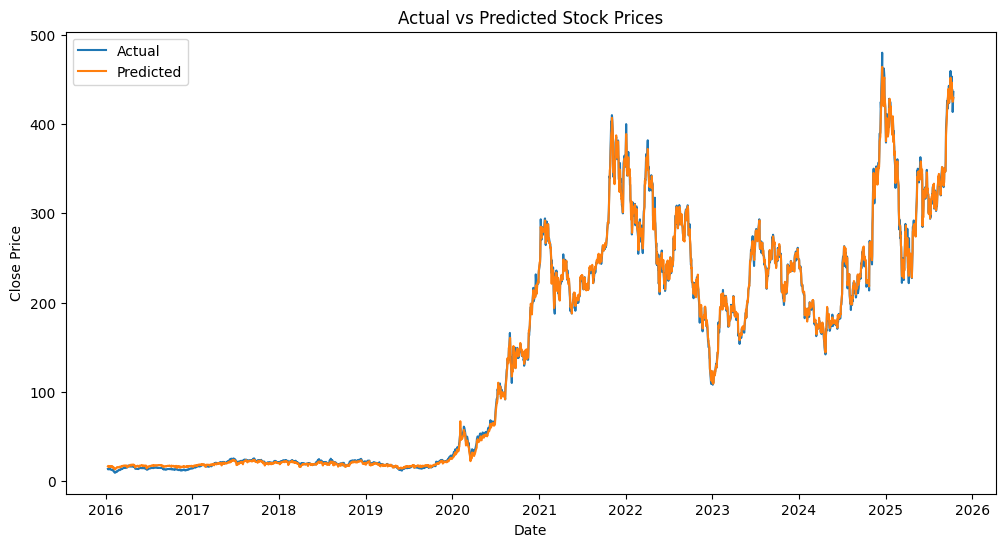

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ml_data['Date'][split_ml : split_ml + common_length], target_scaler.inverse_transform(y_test_ml[:common_length].values.reshape(-1,1)), label='Actual')
plt.plot(ml_data['Date'][split_ml : split_ml + common_length], final_prices, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [90]:
import joblib

joblib.dump(meta_model, "meta_model.pkl")
joblib.dump(feature_scaler, "feature_scaler.pkl")
joblib.dump(target_scaler, "target_scaler.pkl")

['target_scaler.pkl']

In [91]:
model.save("lstm_model.h5")